In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [20]:
# load dataset and show the first five sample

df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')

df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
66,67,Female,43,48,50
142,143,Female,28,76,40
123,124,Male,39,69,91
180,181,Female,37,97,32
67,68,Female,68,48,48
129,130,Male,38,71,75
87,88,Female,22,57,55
100,101,Female,23,62,41
70,71,Male,70,49,55
47,48,Female,27,40,47


In [21]:
# rename the Annual Income (k$)	Spending Score (1-100) column

df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head(5)


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Weird Pattern for the spending score, it's going up and down in the extremes while it's mild in the middle
As expected, age and annual income seem to have little effect towards the spending score


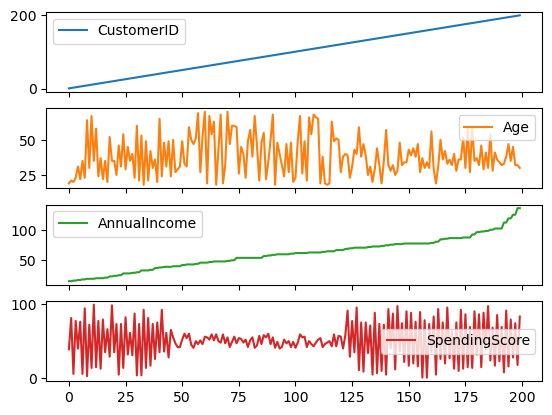

In [29]:
# make an insightful visualization and explain
axes = df.plot.line(subplots=True)
type(axes)
print("Weird Pattern for the spending score, it's going up and down in the extremes while it's mild in the middle")
print("As expected, age and annual income seem to have little effect towards the spending score")

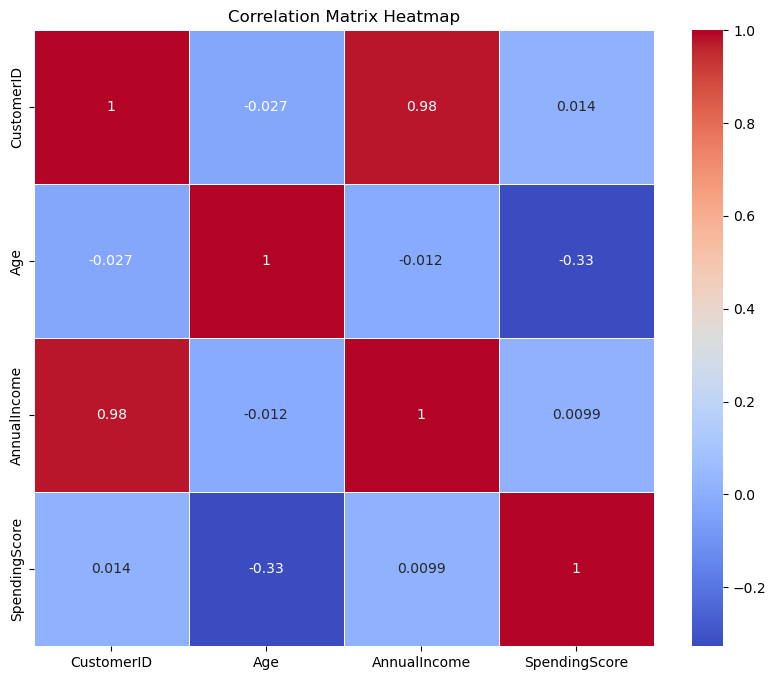

Seems like the heatmap shows that there is no significant factore in determining the spending score


In [30]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

print("Seems like the heatmap shows that there is no significant factore in determining the spending score")
print("The exception is the age, i seems like there is a slight difference")

## Data Preprocessing

For this case study, we only use income and spending score

In [37]:
# create new dataframe that consist only annual income and spending score
df_new = df.drop('CustomerID', axis=1)
df_new = df_new.drop('Gender', axis=1)
df_new = df_new.drop('Age', axis=1)

df_new.head()


,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [44]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_new = pd.DataFrame(sc.fit_transform(df_new), columns=["income","spending"])

df_new.head()


,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [46]:
# get stastical information on the new dataset
df_new.describe()


,income,spending
count,2.000000e+02,2.000000e+02
mean,-7.105427e-17,-8.881784e-18
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

<Axes: xlabel='income', ylabel='spending'>

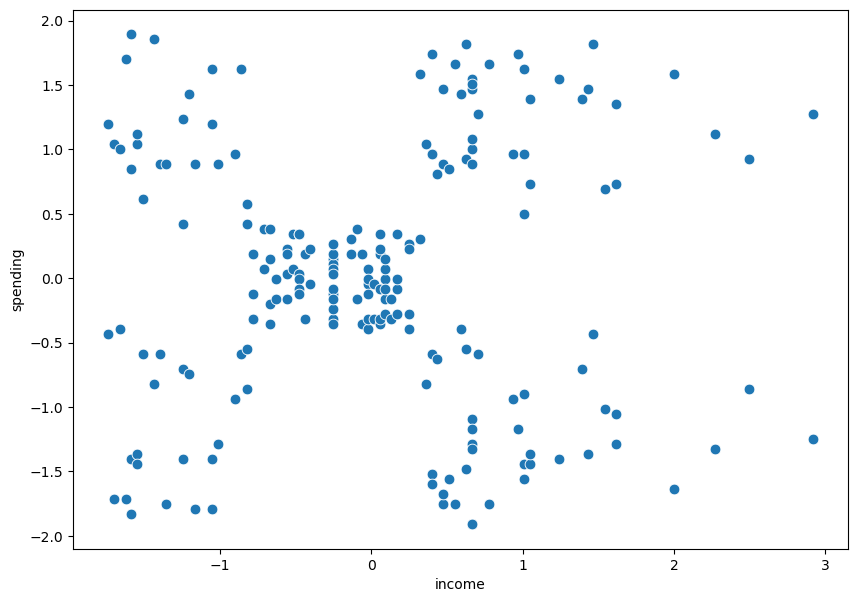

In [59]:
# Visualize the position
plt.figure(figsize=(10,7))

sns.scatterplot(x = "income", y = "spending", data=df_new, s=60)




<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

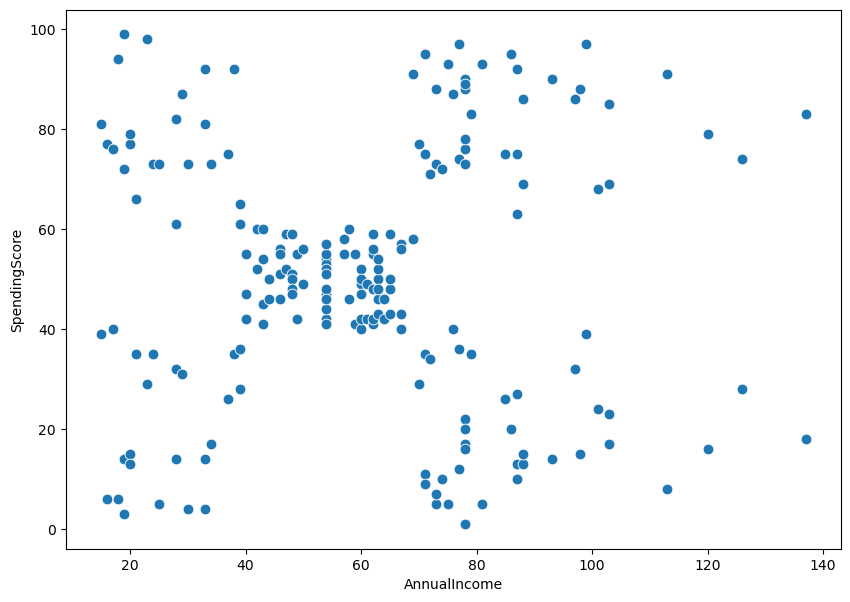

In [60]:
# Visualize the position using the original scale

plt.figure(figsize=(10,7))

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", data=df, s=60)


## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [74]:
# set the parameter for evaluating K

from sklearn.cluster import KMeans
sse=[]
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i, init='random',max_iter=300,random_state=42)
    kmeans.fit(df_new)
    sse.append(kmeans.inertia_)
    

C:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

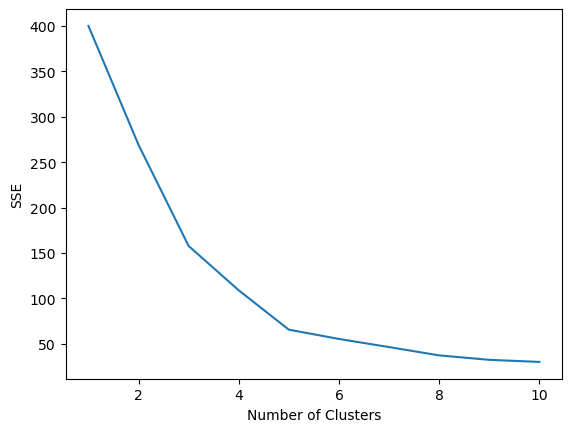

In [75]:
# manually visualize the elbow method using plotlib

plt.plot(range(1,11),sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()



In [76]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)


The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [77]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random',max_iter=300,random_state=42)

y_pred = kmeans.fit_predict(df_new)

y_pred

C:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lolz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

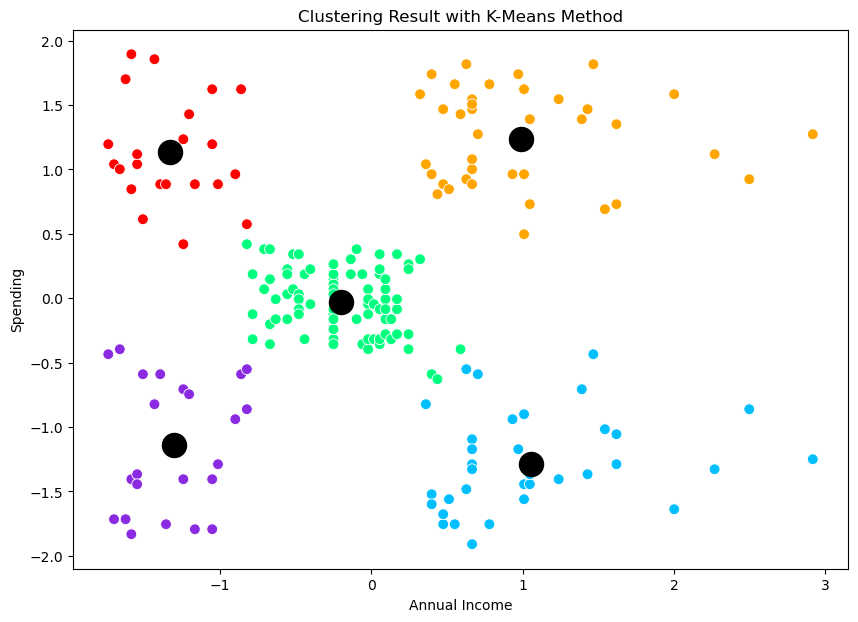

In [78]:
# visualize the result using scater chart

plt.figure(figsize=(10,7))

sns.scatterplot(x = "income", y = "spending", hue=y_pred, palette = ["blueviolet","red","deepskyblue","orange","springgreen"], legend=None,data=df_new,s=60)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()


In [80]:
# Inverse transform the scaled data to get the original values
df_newer = df.drop('CustomerID', axis=1)
df_newer = df_newer.drop('Gender', axis=1)
df_newer = df_newer.drop('Age', axis=1)

df_newer = pd.DataFrame(sc.inverse_transform(df_newer),columns=["income","spending"])

df_newer['Cluster'] = y_pred

df_newer.head()



,income,spending,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [82]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster

cluster_summary = df_newer.groupby(y_pred).agg({'spending':['mean','std','min','max'],'income':['mean','std','min','max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

spending                            income                        
              mean        std   min   max       mean        std   min    max
cluster                                                                     
0        20.913043  13.017167   3.0  40.0  26.304348   7.893811  15.0   39.0
1        79.363636  10.504174  61.0  99.0  25.727273   7.566731  15.0   39.0
2        17.114286   9.952154   1.0  39.0  88.200000  16.399067  70.0  137.0
3        82.128205   9.364489  63.0  97.0  86.538462  16.312485  69.0  137.0
4        49.518519   6.530909  34.0  61.0  55.296296   8.988109  39.0   76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

Offer budget-friendly product recommendations, promotions, and discounts for cluster 0 to encourage more people. for higher clusters, Encourage this group to increase spending through cross-selling, up-selling, and targeted promotions that may turn them into more regular buyers.

<write here>